In [ ]:
# gym
!pip install "gym>=0.21.0"
!pip install tf-agents[reverb]

# reinforcement learning
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
#!pip install tf-agents[reverb] #already installed above
!pip install pyglet

In [1]:
# tensorflow
from tf_agents.policies import random_tf_policy

# standard python
import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/beerql

# ours
import tfdqn
tfdqn.validate_environment()

# uncomment below to test-run the environment
# tfdqn.test_run_environment()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/beerql


In [3]:
num_iterations = 80000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"}
collect_steps_per_iteration =   1# @param {type:"integer"}
replay_buffer_max_length = 1000000  # @param {type:"integer"} 

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 1  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

In [4]:
env, train_py_env, eval_py_env, train_env, eval_env, agent = tfdqn.get_dqn_agent((100, 50), learning_rate)

In [5]:
# compute 5 episodes of random_policy for testing
random_policy = random_tf_policy.RandomTFPolicy(train_env.time_step_spec(), train_env.action_spec())
tfdqn.compute_avg_return(eval_env, random_policy, 5)

-3905.8

In [6]:
replay_buffer, rb_observer = tfdqn.get_replay_buffer(agent, replay_buffer_max_length)

In [7]:
cumulative_returns, dqn_policy = tfdqn.train(
  agent, env, train_py_env, train_env, eval_env, 
  replay_buffer, rb_observer, batch_size,
  num_iterations, initial_collect_steps, collect_steps_per_iteration, 
  log_interval, eval_interval, num_eval_episodes    
)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 200: loss = 1176.9927978515625
step = 400: loss = 642.9270629882812
step = 600: loss = 1595.946533203125
step = 800: loss = 1921.306884765625
step = 1000: loss = 3297.798095703125
step = 1000: Average Return = -3105.0
step = 1200: loss = 3313.2109375
step = 1400: loss = 4745.7509765625
step = 1600: loss = 5415.3544921875
step = 1800: loss = 4992.33984375
step = 2000: loss = 6403.486328125
step = 2000: Average Return = -4826.0
step = 2200: loss = 11256.013671875
step = 2400: loss = 8538.326171875
step = 2600: loss = 3568.15283203125
step = 2800: loss = 8536.7998046875
step = 3000: loss = 6127.1640625
step = 3000: Average Return = -3679.0
step = 3200: loss = 6090.513671875
step = 3400: loss = 16687.220703125
step = 3600: loss = 6679.79296875
step = 3800: loss = 13146.650390625
step = 4000: loss = 27335.69140625
step = 4000: Average Return = -4154.0
step = 4200: loss = 13389.71484375
step = 4400: loss = 16551.216796875
step = 4600: loss = 10859.154296875
step = 4800: loss = 7624.25

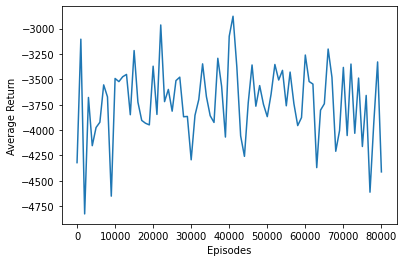

In [8]:
tfdqn.plot_returns(cumulative_returns, num_iterations, eval_interval)

In [9]:
policy_dict, observations_dict, cumulative_returns = tfdqn.dqn_get_policy(eval_env, agent.policy)

In [10]:
agent_names = ["Retailer", "Distributor",  "Manufacturer", "Supplier"] 
import pandas as pd
dfdqn = pd.DataFrame.from_dict(observations_dict)

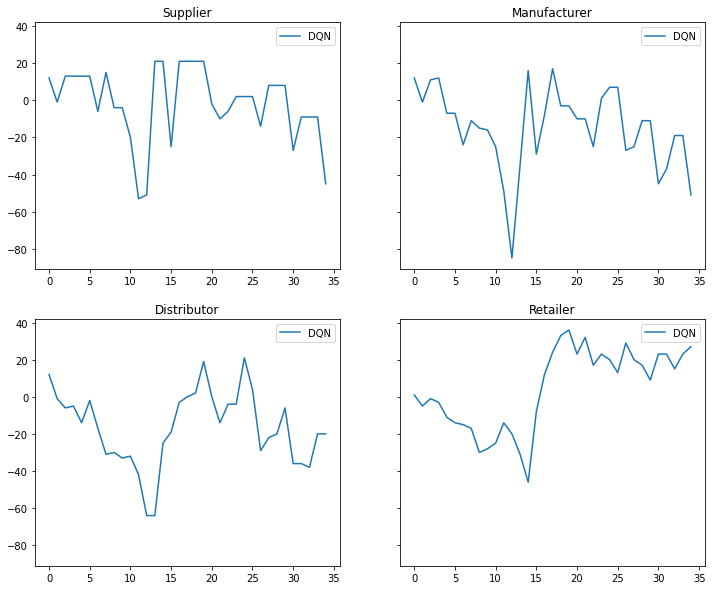

In [11]:
fig, axes = plt.subplots(2,2, sharey=True, figsize=(12,10))

axes[0,0].plot(dfdqn[3], label="DQN")
axes[0,0].set_title("Supplier")
axes[0,0].legend()

axes[0,1].plot(dfdqn[2], label="DQN")
axes[0,1].set_title("Manufacturer")
axes[0,1].legend()

axes[1,0].plot(dfdqn[1], label="DQN")
axes[1,0].set_title("Distributor")
axes[1,0].legend()

axes[1,1].plot(dfdqn[0], label="DQN")
axes[1,1].set_title("Retailer")
axes[1,1].legend()